### This project was undertaken by  Siddhartha from Bangalore

## SUPERSTORE SALES ANALYSIS

### Problem Statement

- A multinational retail company has been making good sales from 2014 to 2017, but their recorded profits do not tally with the increasing amount of sales they have made throughout the period. As an initative of the company to keep increasing their sales, whilst maximizing their sales as best as possible, the campagn titled **'Operation  Increase Sales and Profit'(OISP)** was launched.
- As a part of the campaign initatve, a Data Analyst is required to analyze the dataset that contains their four year daily sales records to draw insights from their "sitting" data before the management team of the company can take any actionable decision with regards to the campaign.


### My Task

- To analyse the given data and advise management on what to do to increase sales and profit as intended in the compaign by outlaying the analytical steps inline with CRISP-DM(Cross Industry Standard Process for Data Mining)steps, asking the nescessary questions and providing answers based on the data.
- Submit statistical summaries of the key variables considering the aim of the campaign to management including visualizations and a report on my findings.

**Powerpoint or any other presentation application can be used for the presentation.**

### STEP 1: IMPORT NECESSARY MODULES

Why is it important to import certain modules when working on a project?
- Think of importing modules like starting a fireplace. You  have your wood, paper or anything else you need to make a fire except the enabler, which in this case, is a light match or lighter.
- Without importing a module that allows you read a csv file from your desktop, ypu can't. Without importing a module that allows you to plot graphs, you can't plot a graph.
- The necessary modules are imported as shown in the next line of code.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 10)

### STEP 2: DATA CLEANING

- With the understanding that Data tells stories, it is important that it is clean before any analysis is made. As the saying goes, Garbage In, Garbage Out. The data was cleaning in Six steps.

#### STEP 2.1 Read the data. Making sure you the data in your current working directory makes it easier.

In [11]:
df = pd.read_csv('super_store.csv', index_col='Row ID', encoding='UTF-8')
df.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,DiscountedSales,Quantity,Discount(%),Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


#### STEP 2.2 How big is the dataset?

In [12]:
df.shape
print('The number of rows is {} and number columns in the dataframe is {}'.format(df.shape[0],df.shape[1]))

The number of rows is 65535 and number columns in the dataframe is 20


#### STEP 2.3 Is each column title of the dataset clean and descriptive?
- The reason why this is important is because in the case where other individual or individuals works on your data, the possibility of understanding and analyzing the context of each column is easy. 

In [13]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country/Region', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'DiscountedSales', 'Quantity', 'Discount(%)', 'Profit'],
      dtype='object')

- In the line of code above, it is clear that some of the titles have white spaces, and one column titled 'Sales' was renamed to 'Discounted Sales' as it was discovered that the Sales column were sales made per discount on each product sold.

In [14]:
df.columns = ['OrderID','OrderDate', 'ShipDate', 'ShipMode', 'CustomerID', 'CustomerName', 'Segment' ,
                         'Country', 'City', 'State', 'PostalCode', 'Region', 'ProductID', 'Category', 'SubCategory',
                         'ProductName' , 'DiscountedSales', 'Quantity', 'Discount(%)', 'Profit']

- The country code was removed as it was repeated through out. This in corrected in the line of code below.

In [15]:
df.drop(['Country'], inplace = True, axis = 1)

- General information from the dataset was retrieved in the line of code below to under the datatype of each column. Observng closely, it is seen that some datatypes of columns are wrong. Take for instance, the OrderDate column is represented as an Object datatype when it s supposed to be a Datetime datatype. 
- This was be corrected later in the analysis.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65535 entries, 1 to 690
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          65535 non-null  object 
 1   OrderDate        65535 non-null  object 
 2   ShipDate         65535 non-null  object 
 3   ShipMode         65535 non-null  object 
 4   CustomerID       65535 non-null  object 
 5   CustomerName     65535 non-null  object 
 6   Segment          65535 non-null  object 
 7   City             65535 non-null  object 
 8   State            65535 non-null  object 
 9   PostalCode       65535 non-null  int64  
 10  Region           65535 non-null  object 
 11  ProductID        65535 non-null  object 
 12  Category         65535 non-null  object 
 13  SubCategory      65535 non-null  object 
 14  ProductName      65535 non-null  object 
 15  DiscountedSales  65535 non-null  float64
 16  Quantity         65535 non-null  int64  
 17  Discount(%)   

#### STEP 2.4 Check for duplicates in the dataset and remove them

In [17]:
duplicates = df.duplicated(keep = False)
duplicates.sum()

65535

In [18]:
# Sort your duplicated sales to see duplicated values
duplicated_sales = df[duplicates].sort_values('Row ID')
duplicated_sales

,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,City,State,PostalCode,Region,ProductID,Category,SubCategory,ProductName,DiscountedSales,Quantity,Discount(%),Profit
Row ID,,,,,,,,,,,,,,,,,,,
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,CA-2018-152156,11/8/2018,11/11/2018,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,CA-2016-125556,11/14/2016,11/16/2016,Second Class,ML-17410,Maris LaWare,Consumer,Fairfield,Connecticut,6824,East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,43.80,10,0.0,21.0240
2211,CA-2016-125556,11/14/2016,11/16/2016,Second Class,ML-17410,Maris LaWare,Consumer,Fairfield,Connecticut,6824,East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,43.80,10,0.0,21.0240
2211,CA-2016-125556,11/14/2016,11/16/2016,Second Class,ML-17410,Maris LaWare,Consumer,Fairfield,Connecticut,6824,East,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,43.80,10,0.0,21.0240


In [19]:
df.drop_duplicates(keep = 'first',ignore_index = True,inplace=True)
df.duplicated(keep = False).unique() #code to confirm that the found duplicates have been dropped
df.duplicated().sum() #code to confirm that the duplcates have been dropped

0

In [20]:
df.shape #Confrmation of dropped duplicates through the checking of total number of rows have reduced by 1

(2211, 19)

#### STEP 2.5  A step by step cleaning of each column in the dataset
- Remember in a previous exploration of the dataset, it was discovered that some datatypes of the columns were not correct? This is going to be corrected in the followng lines of code.

- **Column 1 - Order ID**

In [21]:
df['OrderID'].describe() #summary statistics of the Order ID Column

count               2211
unique              1081
top       CA-2019-157987
freq                  12
Name: OrderID, dtype: object

In [22]:
df['OrderID'].dtype     #checking the datatype of the OrderID Column

dtype('O')

- **Column 2 - Order Date**

In [23]:
df['OrderDate'].dtype  #checking the datatype of the OrderDate Column

dtype('O')

In [24]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])   # Converting into the date to the correct datatype
df['OrderDate'].dtype

dtype('<M8[ns]')

- **Column 3 - Ship Date**

In [25]:
df['ShipDate'] = pd.to_datetime(df['ShipDate'])    #checking the datatype of the ShipDate Column
df['ShipDate'].dtype

dtype('<M8[ns]')

- **Column 4 - Ship Mode**

In [26]:
df['ShipMode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [27]:
df['ShipMode'] = df['ShipMode'].astype('category')    # Changing to datatype to category
df['ShipMode'].dtype

CategoricalDtype(categories=['First Class', 'Same Day', 'Second Class', 'Standard Class'], ordered=False)

In [28]:
df['ShipMode'].describe()   #summary statistcs of the ShipMode Column

count               2211
unique                 4
top       Standard Class
freq                1263
Name: ShipMode, dtype: object

- **Column 5 - Customer ID**

In [29]:
df['CustomerID'].nunique()

587

In [30]:
df['CustomerID'].describe()    #checking summary statistics of the Customer ID column

count         2211
unique         587
top       ZC-21910
freq            18
Name: CustomerID, dtype: object

- **Column 6 - Customer Name**

In [31]:
df['CustomerName'].describe()   #checking summary statistics of the Customer Name column

count                 2211
unique                 587
top       Zuschuss Carroll
freq                    18
Name: CustomerName, dtype: object

- **Column 7 - Segment**

In [32]:
df['Segment'].describe()    #checking summary statistics of the Segment column

count         2211
unique           3
top       Consumer
freq          1191
Name: Segment, dtype: object

In [33]:
df['Segment'] = df['Segment'].astype('category')  #changing the datatype of the segment column from object to category dtype
df['Segment'].dtype

CategoricalDtype(categories=['Consumer', 'Corporate', 'Home Office'], ordered=False)

- **Column 8 - City**

In [34]:
df['City'].describe()      #checking summary statistics of the City column

count              2211
unique              291
top       New York City
freq                233
Name: City, dtype: object

- **Column 9 - State**

In [35]:
df['State'].describe()     #checking summary statistics of the State column    

count           2211
unique            42
top       California
freq             412
Name: State, dtype: object

- **Column 10 - Postal Code**

In [37]:
df['PostalCode'] = df['PostalCode'].astype('str')   # Changing PostalCode from int to str
df['PostalCode'].describe()       #checking summary statistics of the PostalCode column

count      2211
unique      366
top       10009
freq         78
Name: PostalCode, dtype: object

- **Column 11 - Region**

In [39]:
df['Region'].describe()        #checking summary statistics of the Region column    

count     2211
unique       4
top       East
freq       693
Name: Region, dtype: object

- **Column 12 - Product ID**

In [40]:
df['ProductID'].describe()      #checking summary statistics of the ProductID column

count                2211
unique               1271
top       TEC-AC-10003832
freq                    7
Name: ProductID, dtype: object

- **Column 13 - Product Name**

In [41]:
df['ProductName'].describe()    #checking summary statistics of the ProductName column

count                  2211
unique                 1256
top       Easy-staple paper
freq                     12
Name: ProductName, dtype: object

- **Column 14 - Category**

In [42]:
df['Category'].describe()  #checking summary statistics of the Category column

count                2211
unique                  3
top       Office Supplies
freq                 1348
Name: Category, dtype: object

In [43]:
df['Category'] = df['Category'].astype('category')  #change datatype of Category column to category datatype
df['Category']

0             Furniture
1             Furniture
2       Office Supplies
3             Furniture
4       Office Supplies
             ...       
2206    Office Supplies
2207         Technology
2208    Office Supplies
2209         Technology
2210    Office Supplies
Name: Category, Length: 2211, dtype: category
Categories (3, object): ['Furniture', 'Office Supplies', 'Technology']

- **Column 15 - SubCategory**

In [44]:
df['SubCategory'].describe()      #checking summary statistics of the SubCategory column

count        2211
unique         17
top       Binders
freq          335
Name: SubCategory, dtype: object

In [45]:
df['SubCategory'] = df['SubCategory'].astype('category')   #change dataype of SubCategory Column
df['SubCategory']

0       Bookcases
1          Chairs
2          Labels
3          Tables
4         Storage
          ...    
2206      Binders
2207       Phones
2208          Art
2209       Phones
2210      Binders
Name: SubCategory, Length: 2211, dtype: category
Categories (17, object): ['Accessories', 'Appliances', 'Art', 'Binders', ..., 'Phones', 'Storage', 'Supplies', 'Tables']

- **Column 16 - DiscountedSales**

In [46]:
df['DiscountedSales'].describe()  #summary statistics of DiscountedSales Column

count    2211.000000
mean      223.832699
std       512.793527
min         0.876000
25%        16.714000
50%        52.512000
75%       208.930000
max      8159.952000
Name: DiscountedSales, dtype: float64

- **Column 17 - Quantity**

In [47]:
df['Quantity'].describe()        #summary statistics of Quantity Column

count    2211.000000
mean        3.804161
std         2.265839
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

- **Column 18 - Discount(%)**

In [48]:
df['Discount(%)'].describe()       #summary statistics of DiscountAmount Column

count    2211.000000
mean        0.158991
std         0.207214
min         0.000000
25%         0.000000
50%         0.200000
75%         0.200000
max         0.800000
Name: Discount(%), dtype: float64

- **Column 19 - Profit**

In [49]:
df['Profit'].describe()             #summary statistics of Profit Column

count    2211.000000
mean       22.522610
std       188.488552
min     -3839.990400
25%         1.722300
50%         8.488800
75%        28.320750
max      3177.475000
Name: Profit, dtype: float64

#### STEP 2.6 - Checking summary statistics of numerical columns in the dataset

In [50]:
df.describe()

,DiscountedSales,Quantity,Discount(%),Profit
count,2211.000000,2211.000000,2211.000000,2211.000000
mean,223.832699,3.804161,0.158991,22.522610
std,512.793527,2.265839,0.207214,188.488552
min,0.876000,1.000000,0.000000,-3839.990400
25%,16.714000,2.000000,0.000000,1.722300
50%,52.512000,3.000000,0.200000,8.488800
75%,208.930000,5.000000,0.200000,28.320750
max,8159.952000,14.000000,0.800000,3177.475000


#### STEP 2.7 Checking summary statistics of non-numerical columns in the dataset

In [51]:
df.describe(include = np.object)

,OrderID,CustomerID,CustomerName,City,State,PostalCode,Region,ProductID,ProductName
count,2211,2211,2211,2211,2211,2211,2211,2211,2211
unique,1081,587,587,291,42,366,4,1271,1256
top,CA-2019-157987,ZC-21910,Zuschuss Carroll,New York City,California,10009,East,TEC-AC-10003832,Easy-staple paper
freq,12,18,18,233,412,78,693,7,12


#### STEP 2.8  Adding New Columns To the Dataset 
- New columns were added to the dataset in order to easy analyze the data in the dataset.

In [52]:
df_month = df["OrderDate"].dt.month_name()   #adding a month column
df.insert(loc = 3, column = 'OrderMonth', value = df_month)

In [53]:
df_year = pd.DatetimeIndex(df['OrderDate']).year  #adding a new column called Year 
df.insert(loc = 4, column = 'OrderYear', value = df_year)

In [54]:
df['OrderYear'] = df['OrderYear'].astype('str')  #changing OrderYear column from integer to string
df['OrderYear']

0       2018
1       2018
2       2018
3       2017
4       2017
        ... 
2206    2016
2207    2016
2208    2017
2209    2016
2210    2016
Name: OrderYear, Length: 2211, dtype: object

- Calculating the original sales without discounts and adding it to the dataset as a new column

In [55]:
original_sales = (1/(1-df['Discount(%)']))*df['DiscountedSales']
original_sales

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
2206     149.66
2207      47.84
2208      16.52
2209     832.93
2210      43.80
Length: 2211, dtype: float64

In [56]:
df['OriginalSales'] = original_sales

- Calculating Unit Price of each product and adding it to the dataset as a new column

In [57]:
df['UnitPrice'] = original_sales/df['Quantity']
df['UnitPrice']

0       130.98
1       243.98
2         7.31
3       348.21
4        13.98
         ...  
2206     21.38
2207     11.96
2208      4.13
2209    118.99
2210      4.38
Name: UnitPrice, Length: 2211, dtype: float64

- Calculating Cost Price of each product and adding it to the dataset as a new column

In [58]:
df_cost_price = df['DiscountedSales'] - df['Profit']
df_cost_price

0        220.0464
1        512.3580
2          7.7486
3       1340.6085
4         19.8516
          ...    
2206      76.3266
2207      34.4448
2208       8.9208
2209     599.7096
2210      22.7760
Length: 2211, dtype: float64

In [60]:
df['CostPrice'] = df_cost_price

- Calculating Discounted Amount of each product and adding it to the dataset as a new column

In [62]:
df['DiscountedAmount'] = df['OriginalSales'] - df['DiscountedSales']

- Calculating Profit Percentage of each product and adding it to the dataset as a new column

In [63]:
df['Profit%']=(df['Profit']/df['CostPrice'])*100

- With the order date and delivery date columns n the dataset, delivery day lengths were calculated and added as a new column to the dataset

In [64]:
df_interval = df["ShipDate"] - df["OrderDate"]
df_interval = df_interval / np.timedelta64(1,'D')
df.insert(loc = 5, column = 'DeliveryDays', value = df_interval)

In [65]:
df['DeliveryDays'] = df['DeliveryDays'].astype('int')   #changing datatype of deliverydays column from int to str
df['Reliability'] = np.where(df['DeliveryDays'] >= 5, 'Delayed', 'Timely')  #confirmation on whether deliveries were timely or delayed.

### STEP 3: EXPLORATORY DATA ANALYSIS

- The fundamental purpose of exploratory data analysis is to aid in the examination of data prior to making any assumptions. 
- It can aid in the detection of obvious errors, the understanding of data patterns, the detection of outliers or unexpected events, and the discovery of noteworthy connections between variables.
- The followng visualizations were done in the lines of code below.

**HEATMAP FOR CORRELATION**

This is a data visualization technique that shows magnitude of a phenomenon as color in two dimensions. The darker the colour, the stronger the correlation, the lighter the colour, the lesser the correlation. 

In [66]:
heatmap = df[['CostPrice', 'UnitPrice' ,'Quantity', 'OriginalSales', 'Profit', 'Discount(%)' , 'DiscountedAmount',
              'DiscountedSales']]
heatmap.head()

,CostPrice,UnitPrice,Quantity,OriginalSales,Profit,Discount(%),DiscountedAmount,DiscountedSales
0,220.0464,130.98,2,261.96,41.9136,0.00,0.0000,261.9600
1,512.3580,243.98,3,731.94,219.5820,0.00,0.0000,731.9400
2,7.7486,7.31,2,14.62,6.8714,0.00,0.0000,14.6200
3,1340.6085,348.21,5,1741.05,-383.0310,0.45,783.4725,957.5775
4,19.8516,13.98,2,27.96,2.5164,0.20,5.5920,22.3680


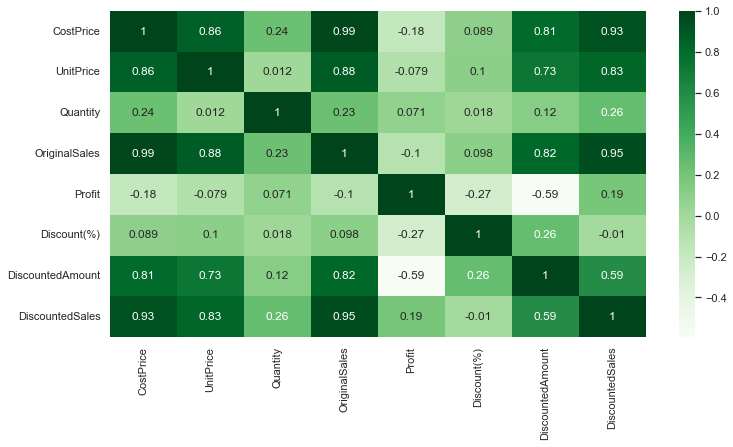

In [67]:
plt.figure(figsize=(12,6))
sns.set_theme(style="white")
corr = heatmap.corr()
heatmap = sns.heatmap(corr, annot=True, cmap = 'Greens')

**NUMERICAL DISTRIBUTION OF COLUMNS**
- The percentage of numeric distribution allows for the measurement of each product's or reference's coverage in a distribution network. 

- This is an important metric for determining a product's sales potential and forecasting sales.

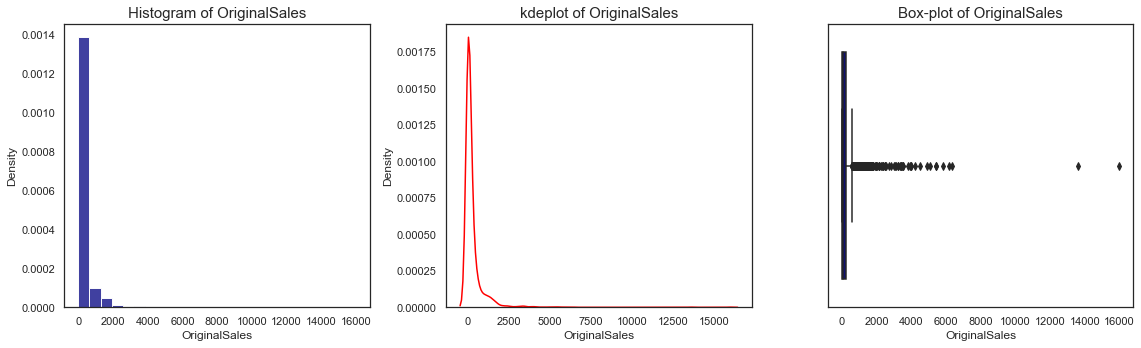

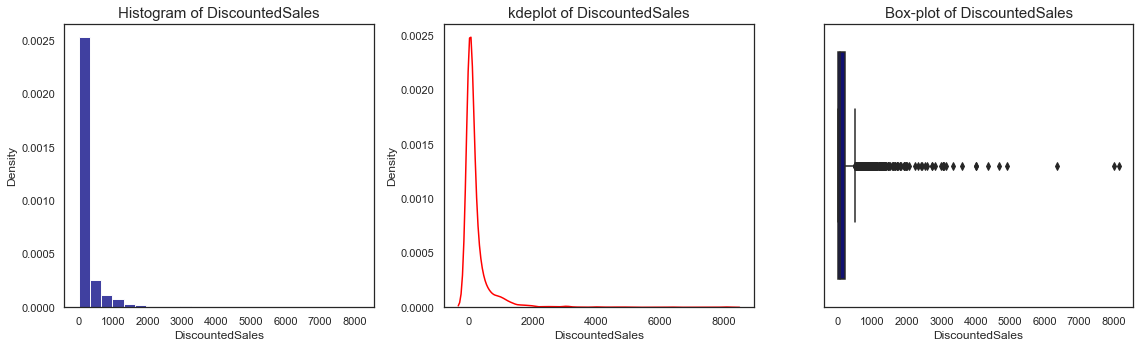

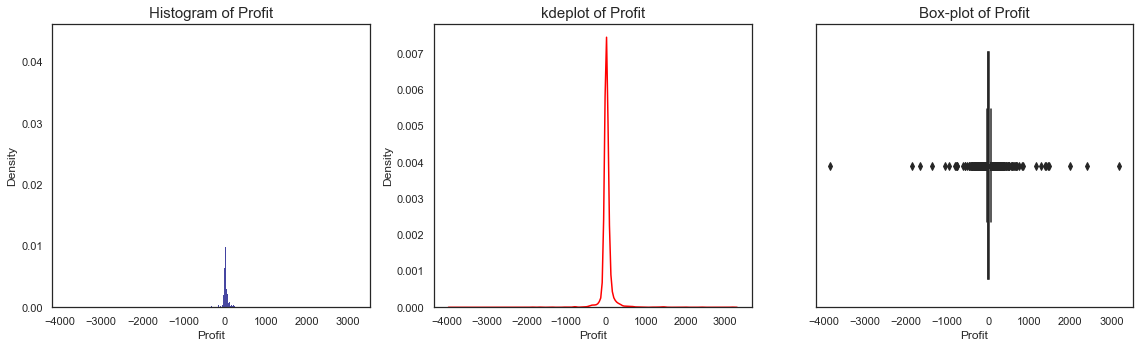

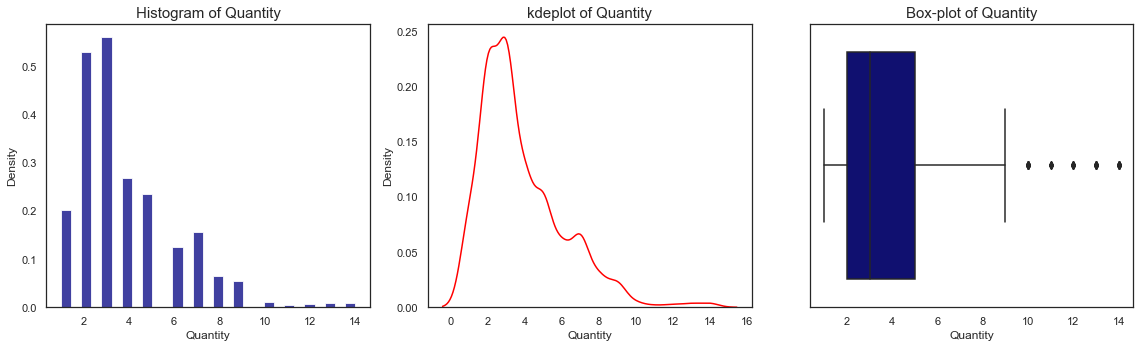

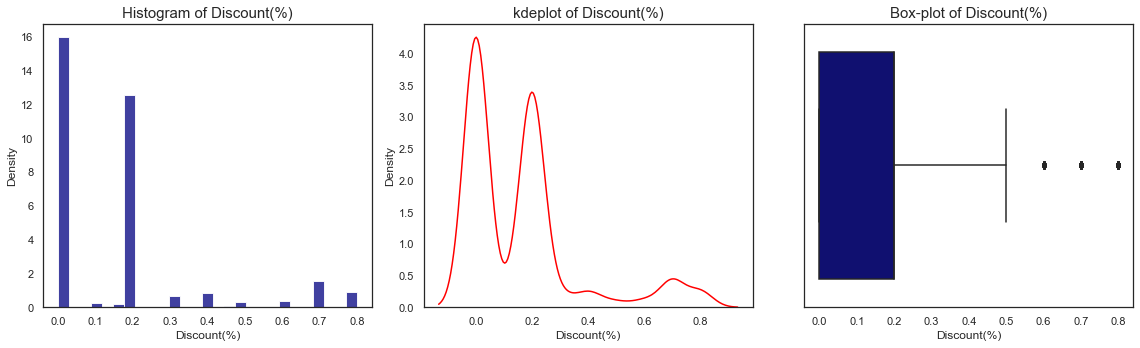

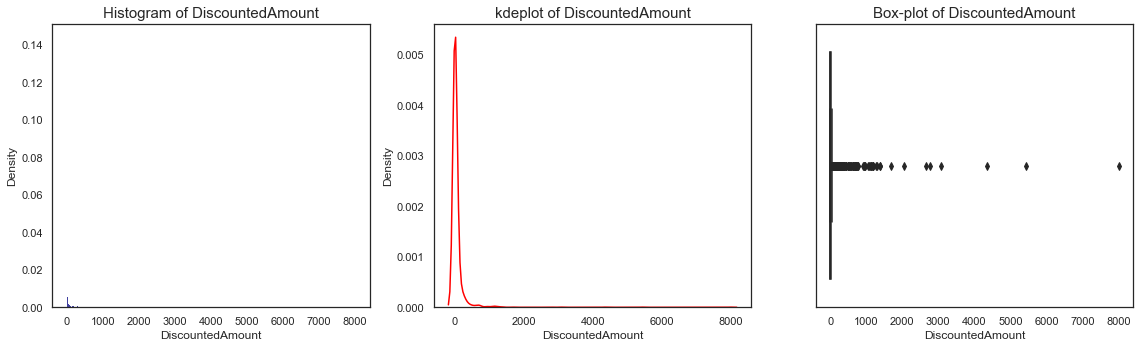

In [68]:
imp_numerical_cols= df[['OriginalSales','DiscountedSales','Profit','Quantity','Discount(%)', 'DiscountedAmount']]
for i,col in enumerate(imp_numerical_cols):
    plt.figure(figsize=(16,5))
    bins='auto'
    if i in [0,1]:
        bins=25
    plt.subplot(1,3,1)
    sns.histplot(data = df,x=col,stat='density',bins=bins,color='navy')
    plt.title(f'Histogram of {col}',size=15)
    
    plt.subplot(1,3,2)
    sns.kdeplot(data = df,x=col,color='red')
    plt.title(f'kdeplot of {col}',size=15)
    
    plt.subplot(1,3,3)
    sns.boxplot(data = df,x=col,color='navy')
    plt.title(f'Box-plot of {col}',size=15)
    plt.tight_layout()
    plt.show()

The following observations were made from the numerical distribution of some column in the immediate line of code above
- The Distribution of Original Sales and DiscountedSales is extremely right skewed.
- The Distribution of Profit is Normally distributed with very low value of standard deviation.  
- The Distribution of Quantity sold is right skewed with a lot of outliers on the right side 
- The Distribution of Discount is multimodel in nature

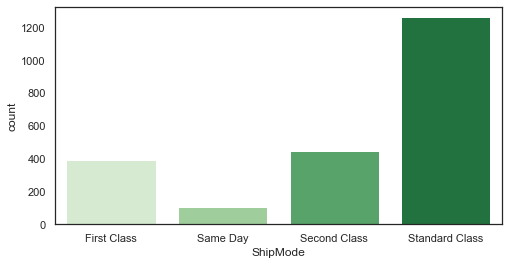

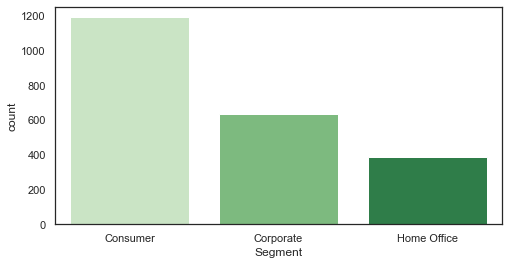

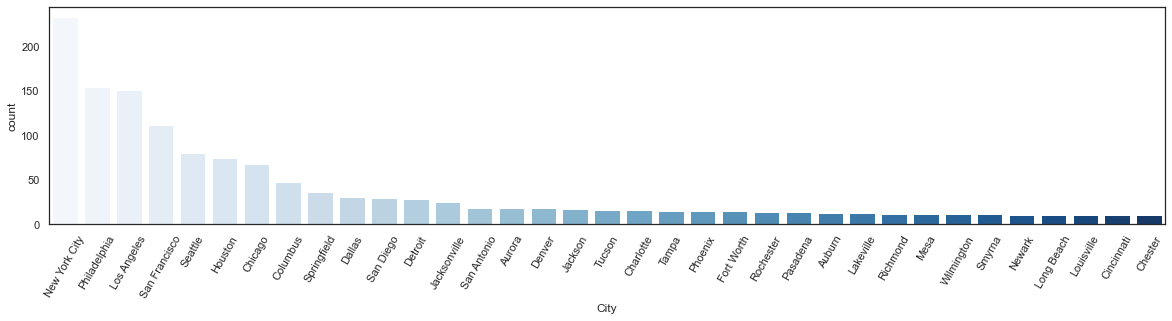

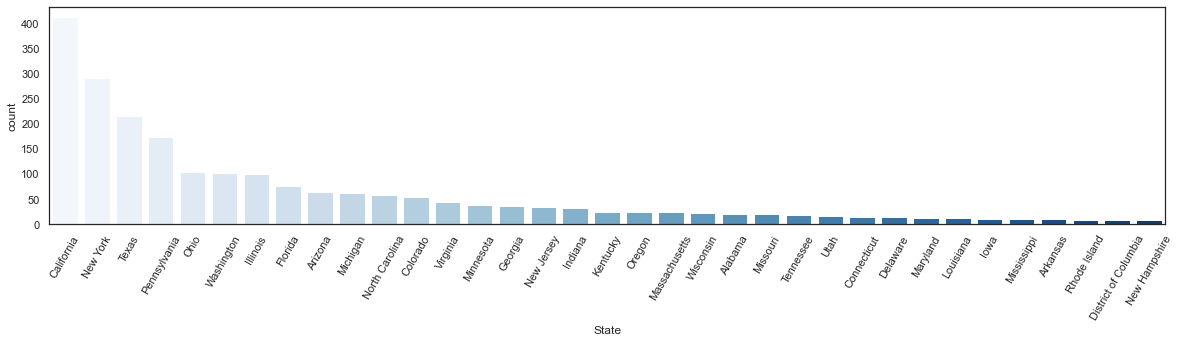

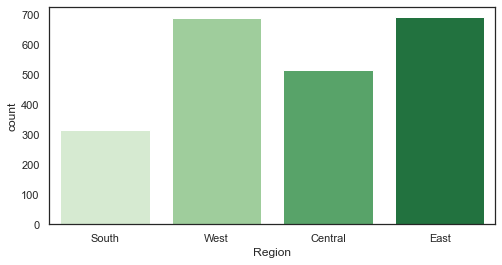

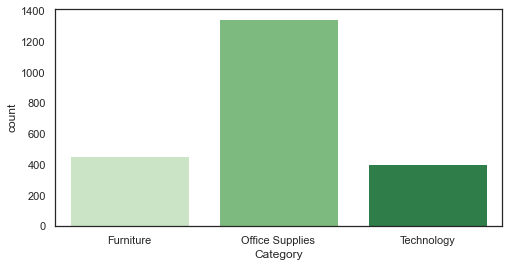

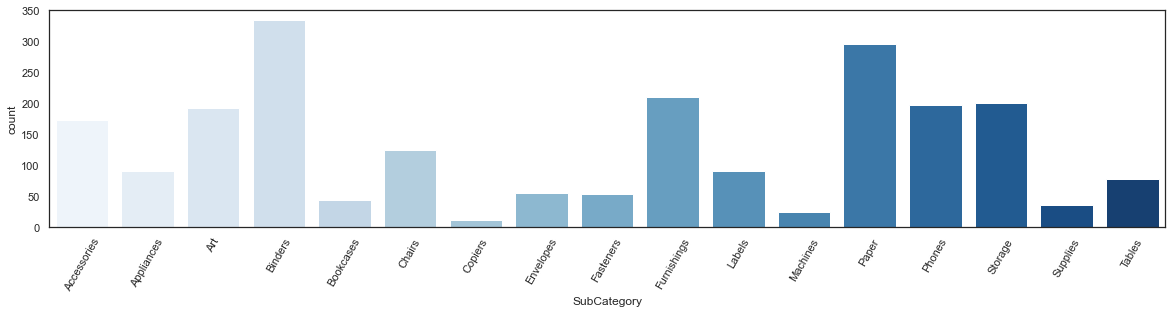

In [69]:
imp_categotical_features=df[['ShipMode','Segment', 'City', 'State','Region','Category', 'SubCategory']]

for col in imp_categotical_features:
    width=8
    n=len(df[col].unique())
    if n > 15:
        width=20
        plt.figure(figsize=(width,4))
        temp=pd.DataFrame(df[col].value_counts().sort_values(ascending=False)[:35],columns=[col])
        sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
        plt.ylabel("count")
        plt.xlabel(col)
        plt.xticks(rotation=60)   
    else:
        plt.figure(figsize=(width,4))
        sns.countplot(data=df,x=col,palette='Greens')
    plt.show()

**COUNT OF SUB-CATEGORY**

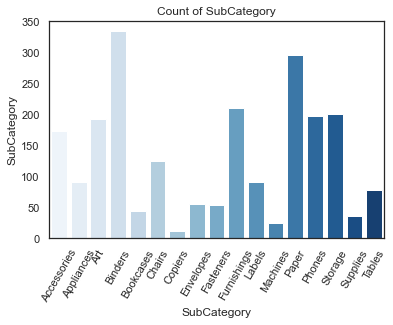

In [70]:
sns.countplot(x='SubCategory', data = df)
sns.set(rc={'figure.figsize':(12,5)})
sns.barplot(data=temp,x=temp.index,y=col,palette= 'Blues')
plt.xticks(rotation=60)
plt.title('Count of SubCategory')
plt.show()

**OBSERVATION FROM GENERAL EXPLORATORY DATA ANALYSIS ABOVE**
- Majority of the customers prefer the Standard Class Shipment mode.
- Most of the customers are from the Consumer segment.
- Among all the cities New York City records the maximum purchases made followed by Los Angeles.
- Among all the states New California records the maximum purchases made followed New York.
- Majority of the purchases are in the East and West regions as compared to South & Central.
- Office Supplies lead the purchases made Category.
- Binders and Paper are the leaders in Product Sub-Category.


**SALES AND PROFIT ANALYSIS**

In [71]:
sales_profit_segment1 = df.groupby('Segment').sum()[['DiscountedSales','Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

,Segment,DiscountedSales,Profit
0,Consumer,265337.3164,26227.7491
1,Corporate,142981.8238,10544.0767
2,Home Office,86574.9577,13025.6649


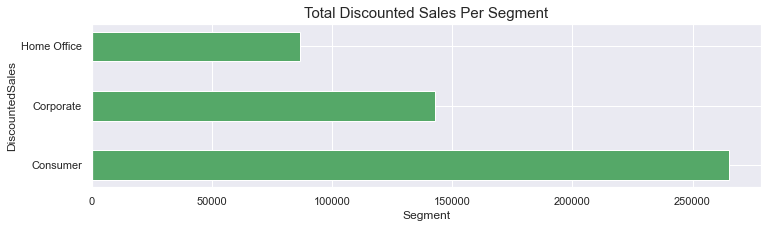

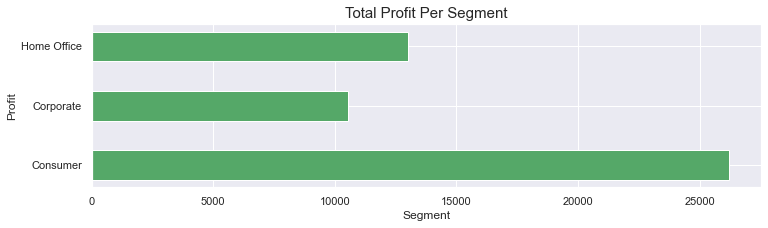

In [72]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['DiscountedSales'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Discounted Sales Per Segment',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment1['Segment'],sales_profit_segment1['Profit'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Total Profit Per Segment',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()

- From the above graphs, it is realized that the consumer segment is doing positively well in terms of profit and discounted sales anfd the Home Office segment is the least performing in terms of discounted sales and profit.
- Please keep in mind that this chart is based on the total amount of discounted sales and profit  for each segment.

In [73]:
sales_profit_segment = df.groupby('Segment').mean()[['DiscountedSales','Profit']]
sales_profit_segment = sales_profit_segment.reset_index()
sales_profit_segment

,Segment,DiscountedSales,Profit
0,Consumer,222.785320,22.021620
1,Corporate,225.168226,16.604845
2,Home Office,224.870020,33.832896


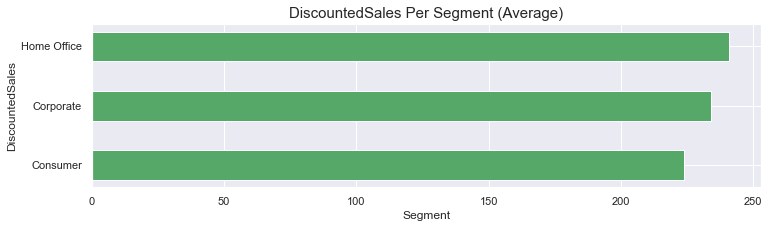

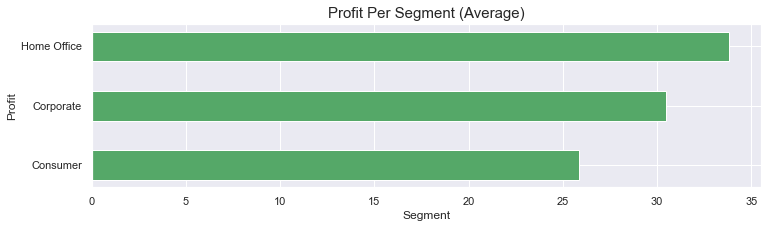

In [61]:
plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['DiscountedSales'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('DiscountedSales Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('DiscountedSales')
plt.xlabel('Segment')
plt.show()

plt.figure(figsize=(12,3))
plt.barh(sales_profit_segment['Segment'],sales_profit_segment['Profit'], 
        color = 'g',
        alpha = 1,
       height=0.5)

plt.title('Profit Per Segment (Average)',fontdict={'fontsize':15})
plt.ylabel('Profit')
plt.xlabel('Segment')
plt.show()


- Contrastingly, it is seen from the graphs n the mmediate lines of code that the consumer segment is doing poorly in terms of profit and discounted sales and the Home Office segment is the best performing in terms of discounted sales and profit.
- Please keep in mind that this chart is based on the average amount of discounted sales and profit  for each segment.

With the evident constrasts of the graphs results above based on changes such as the "total" and "average" of the segments, it is worth noting that basing your analysis on the total discounted sales or profit would provide misleading results.
- This is because the total takes into account the every single purchase made.
- The average takes into account every single purchase made wth all things equal.

**REGION WITH THE HIGHEST COUNT**

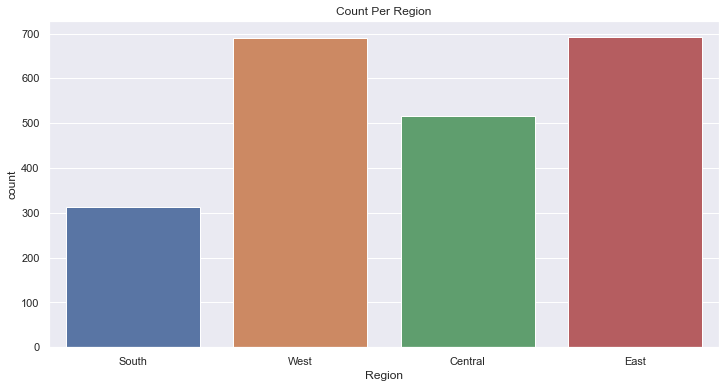

In [74]:
plt.figure(figsize=(12,6))
sns.countplot(x='Region', data = df)
plt.xticks(rotation = 0)
plt.title('Count Per Region')
plt.show()

**BEST SELLING AND MOST PROFITABLE CATEGORY**

In [75]:
df1_sum = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].sum())
df1_sum

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,168377.1199,1368.4535,1737
Office Supplies,145139.2900,23129.1684,5106
Technology,181377.6880,25299.8688,1568


In [76]:
df1_avg = pd.DataFrame(df.groupby(['Category'])[['DiscountedSales', 'Profit', 'Quantity']].mean())
df1_avg

,DiscountedSales,Profit,Quantity
Category,,,
Furniture,368.440087,2.994428,3.800875
Office Supplies,107.670096,17.158137,3.787834
Technology,446.743074,62.314948,3.862069


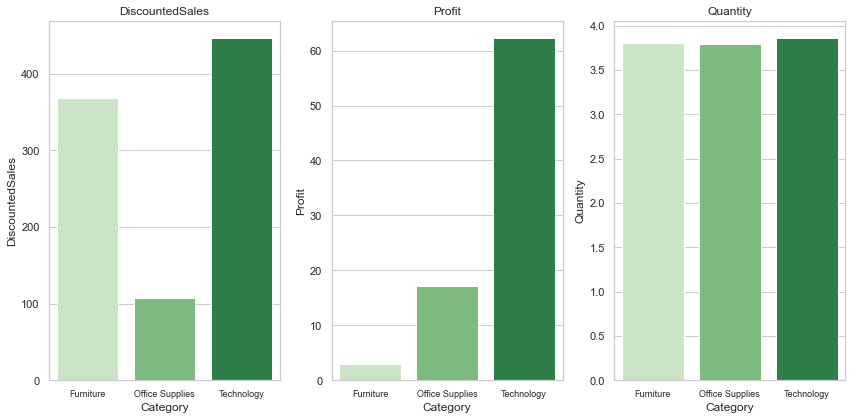

In [77]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
# Plot barplots
cat1 = sns.barplot(x = df1_avg.index, y = df1_avg.DiscountedSales, ax=axis[0], palette = "Greens")
cat2 = sns.barplot(x = df1_avg.index, y = df1_avg.Profit, ax=axis[1], palette = "Greens")
cat3 = sns.barplot(x = df1_avg.index, y = df1_avg.Quantity, ax=axis[2], palette = "Greens")
# Set titles
cat1.set(title = 'DiscountedSales')
cat2.set(title = 'Profit')
cat3.set(title = 'Quantity')
# Rotate axis for x-axis
plt.setp(cat1.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat2.get_xticklabels(), rotation = 'horizontal', size = 9)
plt.setp(cat3.get_xticklabels(), rotation = 'horizontal', size = 9)
# Set spacing between subplots
figure.tight_layout()

- Here, we can see that all though the quantities of all the Categories are close to same as per the grapgh on the far right, it is shown that the Technology category has the highest sale, and equally brings in the most sales to the superstore.

- Next off, we see that the Furnture category is the second best selling category after the Technology category but brings in the least profits.

- Lastly, the least selling category shown as the Office Supplies, is the category bringing in the second best categoory performing in terms of profit.

These insights are important to be data driven decisions later in the final analysis.

**MOST PROFITABLE CATEGORY**

In [78]:
df2_avg = pd.DataFrame(df.groupby(['SubCategory'])[['DiscountedSales', 'Profit']].mean())

# Sort by descending order according to sales
sub_df2 = pd.DataFrame(df2_avg.sort_values('DiscountedSales', ascending = False))
sub_df2 = sub_df2.reset_index()
sub_df2.head(5)

,SubCategory,DiscountedSales,Profit
0,Machines,2093.857667,11.044900
1,Copiers,1449.972545,526.398927
2,Tables,719.141782,-70.338765
3,Chairs,566.177424,52.333234
4,Bookcases,512.679339,-51.291418


In [79]:
 # Sort by descending order according to profit
sub_profit_df2 = pd.DataFrame(sub_df2.sort_values('Profit', ascending = False))
sub_profit_df2 = sub_profit_df2.reset_index()
sub_profit_df2.head(5)

,index,SubCategory,DiscountedSales,Profit
0,1,Copiers,1449.972545,526.398927
1,9,Accessories,216.565815,53.006871
2,3,Chairs,566.177424,52.333234
3,5,Phones,392.472323,50.879870
4,12,Envelopes,67.718691,28.267945


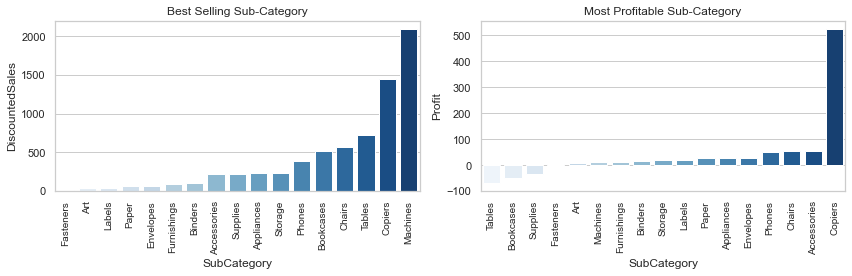

In [80]:
sns.set_theme(style="whitegrid")
figure, axis = plt.subplots(1, 2, figsize=(12, 4))
subcat1 = sns.barplot(data = sub_df2, x = sub_df2.SubCategory, y = sub_df2.DiscountedSales, ax=axis[0], palette = "Blues",
                      order=sub_df2.sort_values('DiscountedSales').SubCategory)
subcat1.set(title="Best Selling Sub-Category")
subcat1.set_xticklabels(subcat1.get_xticklabels(),rotation = "vertical", size = 10)
subcat2 = sns.barplot(data = sub_profit_df2, x = sub_profit_df2.SubCategory, y = sub_profit_df2.Profit, ax=axis[1], 
                      palette = "Blues",order=sub_profit_df2.sort_values('Profit').SubCategory)
subcat2.set(title = "Most Profitable Sub-Category")
subcat2.set_xticklabels(subcat2.get_xticklabels(),rotation = "vertical", size = 10)
figure.tight_layout()
plt.show()

- From the graph above to the right, it is shown that Tables, Bookcases, Supplies and Fasteners are the subcategories that are causing the most losses, as far as negative profit figures.
- From the graph to the left, the Copiers, Machines, Tables, Chairs and Bookcases are the best seling sub-categories.

It is worth noting that even though Copiers, Tables and Bookcases are the least profitable sub-categories, they are shown as the best selling sub-categories in the chart to the left. 

It is an immediate recommendation that:

- Super Store should ensure inventory are always well-stocked for the top selling sub-category such as Copiers, Machines and Tables.
- Despite being most profitable, Copiers sell the least only 234, but as it is a relatively expensive office equipment that is usually used for few years, it is understandable that it sells the least among all
- Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss

**BEST PERFORMING CATEGORY**

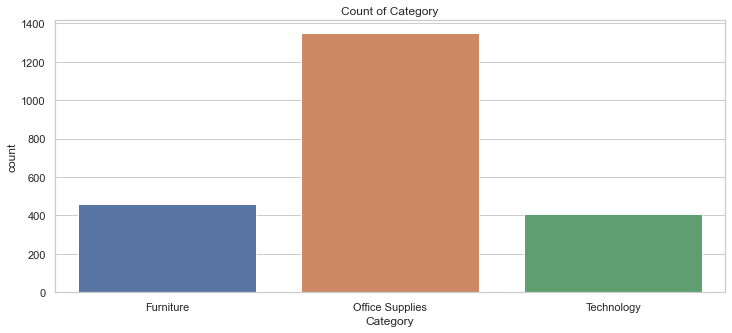

In [81]:
sns.countplot(x='Category', data = df)
plt.title('Count of Category')
plt.show()

As shown in the above lines of code:
    
- Office Supplies is the best performing category
- Furniture is the second best performing category
- Technology is the least performing category

**TOP TEN BEST PERFORMING CITIES**

In [82]:
city_sales_df = pd.DataFrame(df.groupby(['City'])['DiscountedSales','Quantity','Profit'].mean().
                             sort_values('DiscountedSales',ascending = False))
top10 = city_sales_df[:10]
top10

,DiscountedSales,Quantity,Profit
City,,,
Yonkers,1531.455500,4.500000,563.356625
Burlington,1379.069667,4.000000,-633.118383
Asheville,1363.960000,5.000000,85.247500
Anaheim,1295.780000,2.000000,310.987200
Fresno,1217.407625,6.500000,80.176400
Madison,1173.453333,6.000000,233.264000
Raleigh,1127.976000,3.000000,126.897300
Virginia Beach,1114.953333,4.666667,484.159300
Atlanta,1073.000000,3.000000,533.581867


In [83]:
bottom10 = city_sales_df[-10:]
bottom10

,DiscountedSales,Quantity,Profit
City,,,
Plainfield,6.480,1.0,3.1752
Keller,6.000,2.0,2.1000
Rancho Cucamonga,5.760,2.0,2.6496
Bellevue,5.280,3.0,1.5312
Layton,4.960,4.0,2.3312
Knoxville,4.704,2.0,0.4116
Boca Raton,4.608,2.0,1.6704
Ormond Beach,2.808,3.0,-1.9656
Brownsville,1.744,1.0,-0.3488


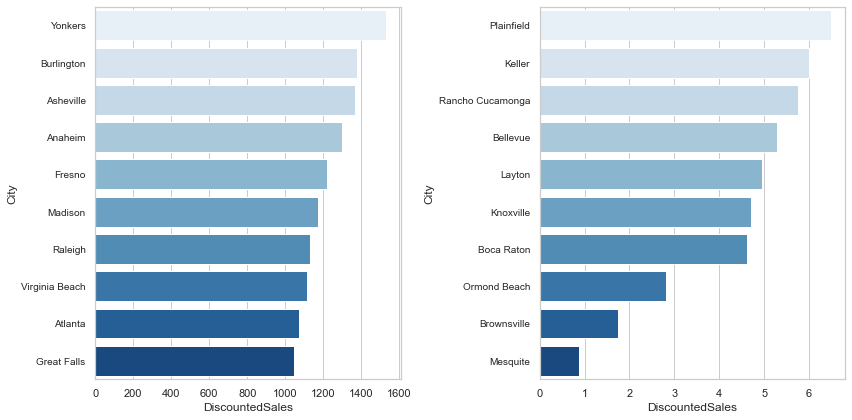

In [84]:
figure, axis = plt.subplots(1,2, figsize=(12, 6))
sns.set_theme(style="whitegrid")

top10c = sns.barplot(data = top10, y = top10.index, x = top10.DiscountedSales, palette = "Blues", ax = axis[0])
#top10c.set(Title = "Top 10 Cities with Highest Sales")
top10c.set_yticklabels(top10c.get_yticklabels(),size = 10)

# Plot Bar Plot for Best Selling Sub-Category
bottom10c = sns.barplot(data = bottom10, y = bottom10.index, x = bottom10.DiscountedSales, palette = "Blues", ax=axis[1])
#bottom10c.set(Title = "Bottom 10 Cities with Lowest Sales")
bottom10c.set_yticklabels(bottom10c.get_yticklabels(),size = 10)

# Set spacing between subplots
figure.tight_layout()
plt.show()

**PRODUCT ANALYSIS**

In [85]:
df['SubCategory'].value_counts()

Binders        335
Paper          296
Furnishings    210
Storage        200
Phones         198
              ... 
Fasteners       54
Bookcases       44
Supplies        36
Machines        24
Copiers         11
Name: SubCategory, Length: 17, dtype: int64

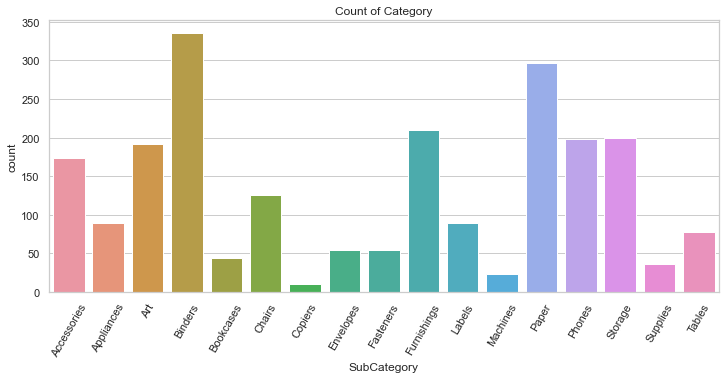

In [86]:
sns.countplot(x='SubCategory', data = df)
sns.set_theme(style="whitegrid")
plt.title('Count of Category')
plt.xticks(rotation = 60)
plt.show()

**BEST PERFORMING PRODUCT**

In [87]:
fur_entr=df[df['Category']=='Furniture']

In [88]:
fur_group=fur_entr.groupby(['Category', 'ProductName'])['Quantity'].sum().reset_index().sort_values('Quantity', 
                                                                                                    ascending = False)
fur_group=fur_group[['ProductName','Quantity']].set_index('ProductName')
fur_group

,Quantity
ProductName,
Longer-Life Soft White Bulbs,27
"Global Value Mid-Back Manager's Chair, Gray",27
KI Conference Tables,27
9-3/4 Diameter Round Wall Clock,23
"DAX Value U-Channel Document Frames, Easel Back",22
...,...
"Howard Miller 11-1/2"" Diameter Ridgewood Wall Clock",0
"Howard Miller 11-1/2"" Diameter Grantwood Wall Clock",0
Hon Valutask Swivel Chairs,0


<AxesSubplot:ylabel='Quantity'>

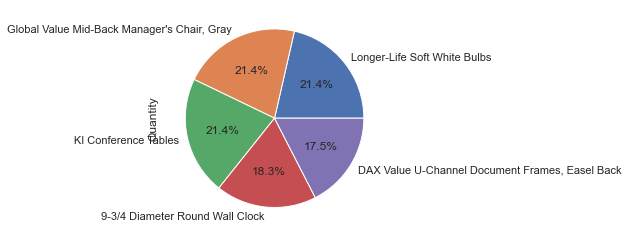

In [89]:
plt.figure(figsize=(4,8))
fur_group.head(5)['Quantity'].plot.pie(autopct="%1.1f%%")

**COUNT OF SUB-CATEGORY REGION-WISE**

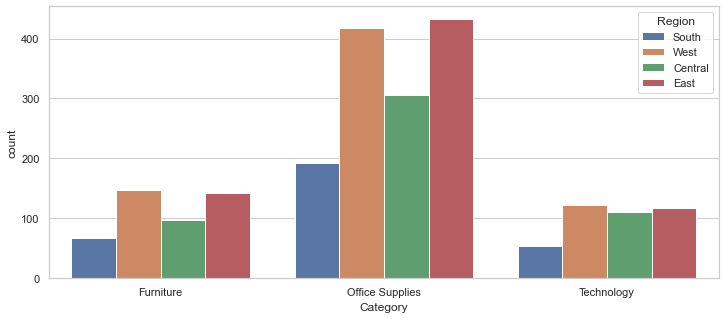

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x="Category", hue="Region", data=df)
plt.show()

- It is observed in the above line of code that people residing in Western part of US tend to order more from superstore.

**CUSTOMER ANALYSIS**

In [91]:
#Top 10 customers who order frequently
df_top10= df['CustomerName'].value_counts().head(10)
df_top10

Zuschuss Carroll    18
Naresj Patel        16
Joel Eaton          15
Tracy Blumstein     14
Ross Baird          13
Greg Guthrie        13
Damala Kotsonis     13
Becky Martin        13
Jonathan Doherty    12
Bradley Nguyen      12
Name: CustomerName, dtype: int64

**DISCOUNT COLUMN INSIGHTS**

In [92]:
a = df.pivot_table('Discount(%)', index = 'SubCategory', aggfunc='sum')
a = a.reset_index().sort_values('Discount(%)')
a

,SubCategory,Discount(%)
6,Copiers,1.8
15,Supplies,3.4
7,Envelopes,4.6
8,Fasteners,5.0
10,Labels,5.8
...,...,...
16,Tables,20.5
12,Paper,21.0
9,Furnishings,28.8
13,Phones,31.6


<AxesSubplot:xlabel='SubCategory'>

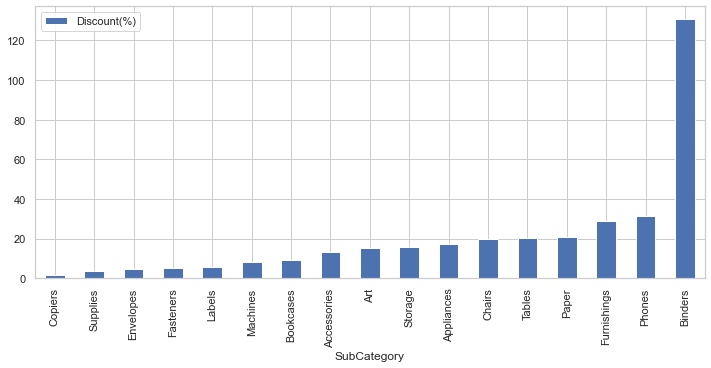

In [93]:
a.plot.bar(x= 'SubCategory')

**MONTHLY AND YEARLY ANALYSIS**

In [94]:
# Which month does the company records more sales?
month_sales_df = pd.DataFrame(df.groupby(['OrderMonth'])['DiscountedSales', 'Quantity', 'Profit', 'DiscountedAmount']
                              .mean().sort_values('DiscountedSales',ascending = False))
month_sales_df = month_sales_df.reset_index()
month_sales_df = month_sales_df.set_index('OrderMonth')
month_sales_df

,DiscountedSales,Quantity,Profit,DiscountedAmount
OrderMonth,,,,
September,281.981215,3.539519,4.432678,107.338338
March,267.616094,3.384000,71.473844,35.847746
December,254.995740,4.037855,30.843835,52.684166
May,238.337845,3.887324,42.690656,43.098282
January,216.590455,3.443182,18.781505,71.058182
...,...,...,...,...
November,207.696085,3.919732,14.719722,60.872878
August,195.789176,3.878205,17.656289,55.230054
June,192.292698,3.869347,22.165632,37.118307


- From September to December the company recorded the highest sales.

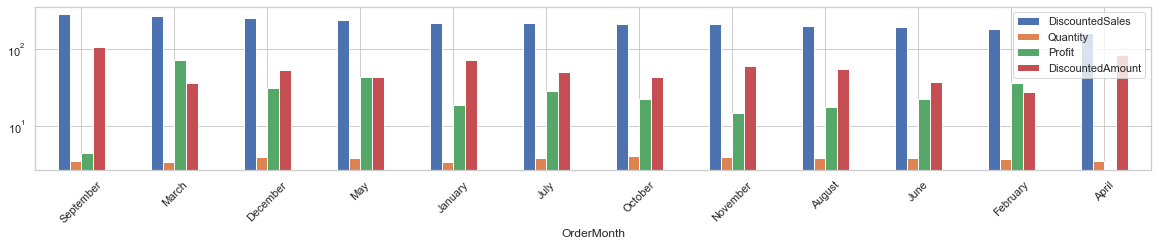

In [95]:
month_sales_df.plot(kind = 'bar', figsize = (20,3))
plt.xticks(rotation = 45)
plt.yscale('log')

In [96]:
tf = df.groupby(['OrderMonth'])['DiscountedSales', 'SubCategory', 'Profit', 'Quantity', 'DiscountedAmount'].sum()
tf.head()

,DiscountedSales,Profit,Quantity,DiscountedAmount
OrderMonth,,,,
April,27990.7045,-811.2181,615,14611.4955
August,30543.1115,2754.3811,605,8615.8885
December,80833.6495,9777.4956,1280,16700.8805
February,12201.0260,2431.5463,253,1880.4540
January,19059.9600,1652.7724,303,6253.1200


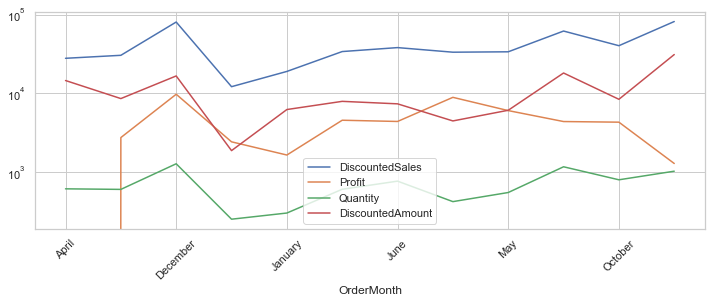

In [97]:
tf.plot(kind = 'line', figsize = (12,4))
plt.xticks(rotation = 45)
plt.yscale('log')

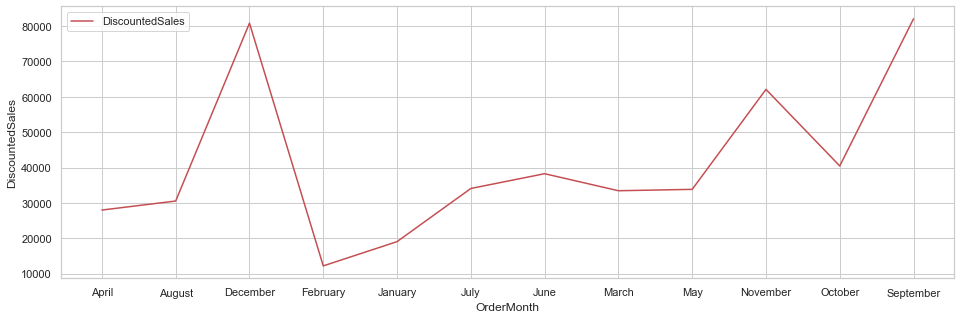

In [98]:
plt.figure(figsize = (16,5))
sns.lineplot('OrderMonth', 'DiscountedSales', data = tf, color = 'r', label= 'DiscountedSales')
plt.legend()

In [99]:
tf = tf.reset_index()
tf

,OrderMonth,DiscountedSales,Profit,Quantity,DiscountedAmount
0,April,27990.7045,-811.2181,615,14611.4955
1,August,30543.1115,2754.3811,605,8615.8885
2,December,80833.6495,9777.4956,1280,16700.8805
3,February,12201.0260,2431.5463,253,1880.4540
4,January,19059.9600,1652.7724,303,6253.1200
...,...,...,...,...,...
7,March,33452.0118,8934.2305,423,4480.9682
8,May,33843.9740,6062.0732,552,6119.9560
9,November,62101.1295,4401.1970,1172,18200.9905
10,October,40458.1315,4320.9260,801,8436.3985


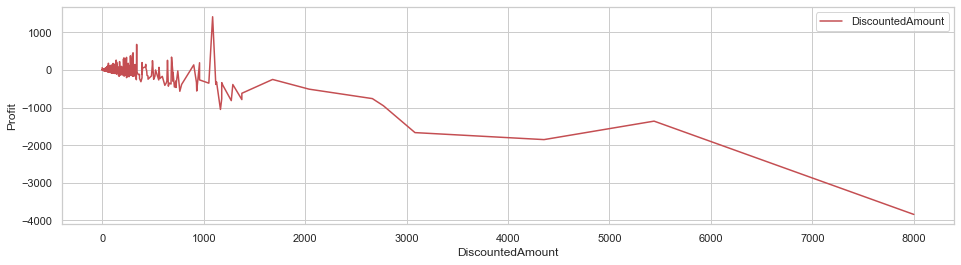

In [100]:
plt.figure(figsize = (16,4))
sns.lineplot('DiscountedAmount', 'Profit', data = df, color = 'r', label= 'DiscountedAmount')
plt.legend()

In [101]:
# Which year does the company records more sales?
year_sales_df = pd.DataFrame(df.groupby(['OrderYear'])['DiscountedAmount', 'Profit'].mean().sort_values
                             ('OrderYear',ascending = True))
year_sales_df = year_sales_df.reset_index()
year_sales_df

,OrderYear,DiscountedAmount,Profit
0,2016,74.686193,26.480434
1,2017,60.511750,25.780633
2,2018,53.640421,23.603081
3,2019,54.882081,16.401895


- There is a gradual increase in sales, qauntity and profit of company records

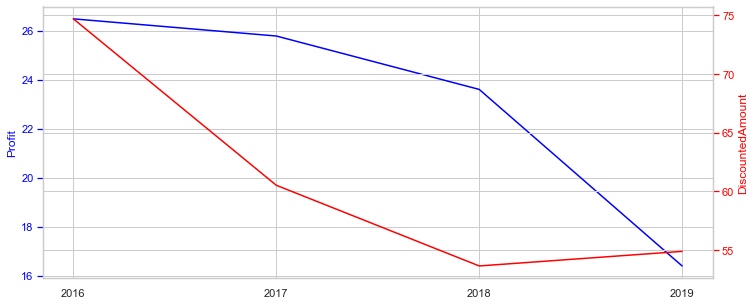

In [102]:
fig,ax = plt.subplots()       # Initalize a Figure and Axes
ax.plot(year_sales_df['OrderYear'], year_sales_df["Profit"], color='blue')   # Plot the CO2 variable in blue
ax.set_ylabel("Profit",color='blue')
ax.tick_params('y', colors='blue')
ax2 = ax.twinx()         # Create a twin Axes that shares the x-axis

ax2.plot(year_sales_df['OrderYear'], year_sales_df['DiscountedAmount'], color='red')    # Plot the relative temperature in red
ax2.set_ylabel("DiscountedAmount",color='red')
ax2.tick_params('y', colors='red')
plt.show()

**WHICH CUSTOMER SEGMENT IS THE MOST PROFITABLE?**

In [103]:
df4 = pd.DataFrame(df.groupby(['Segment'])[['Profit']].mean())
df4

,Profit
Segment,
Consumer,22.021620
Corporate,16.604845
Home Office,33.832896


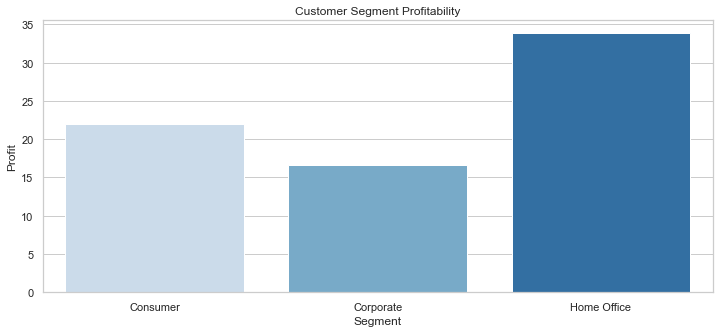

In [104]:
sns.set_theme(style="whitegrid")
sns.barplot(data = df4, x = df4.index, y = df4.Profit, palette = "Blues")
plt.title("Customer Segment Profitability")
plt.show()

**WHICH IS THE PREFERRED SHIP MODE?**

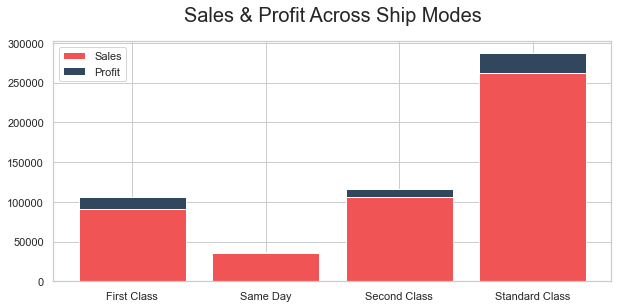

In [105]:
# Taking a subset of data (To keep things simple)
df_stackb = df[['ShipMode','DiscountedSales','Profit']]
# taking a groupby on category and then ship mode...
df_stackb = df_stackb.groupby(['ShipMode']).sum().reset_index()
# df_stackb

# Visualizing the Stacked BarChart
plt.figure(figsize=[10,15])
plt.subplot(3,1,1)
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['DiscountedSales'], color='#F05454')
plt.bar(x=df_stackb['ShipMode'], height=df_stackb['Profit'], bottom=df_stackb['DiscountedSales'], color='#30475E')
plt.title("Sales & Profit Across Ship Modes", size=20, pad=20)
plt.legend(['Sales','Profit'])

#### LOSS ANALYSIS

In [106]:
loss_df = df[df['Profit'] < 0]

In [107]:
loss_with_zero_df = df[(df['Profit'] < 0) & (df['Discount(%)'] == 0)]
loss_with_zero_df.head()

,OrderID,OrderDate,ShipDate,OrderMonth,OrderYear,DeliveryDays,ShipMode,CustomerID,CustomerName,Segment,City,...,ProductName,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%,Reliability


In [108]:
loss_df.head(2)

,OrderID,OrderDate,ShipDate,OrderMonth,OrderYear,DeliveryDays,ShipMode,CustomerID,CustomerName,Segment,City,...,ProductName,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%,Reliability
3,US-2017-108966,2017-10-11,2017-10-18,October,2017,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.031,1741.05,348.21,1340.6085,783.4725,-28.571429,Delayed
14,US-2017-118983,2017-11-22,2017-11-26,November,2017,4,Standard Class,HP-14815,Harold Pawlan,Home Office,Fort Worth,...,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5,0.80,-123.858,344.05,68.81,192.6680,275.2400,-64.285714,Timely


**MONEY LOSS WITHIN THE FOUR YEAR RANGE IN DOLLARS**

In [109]:
Total_loss=np.negative(loss_df['Profit'].sum())
print("Total loss = %.2f" %Total_loss)

Total loss = 39034.24


In [110]:
loss_df['Discount(%)'].mean()

0.4872397094430993

In [111]:
loss_df.groupby(by='Segment').mean()

,DeliveryDays,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
Segment,,,,,,,,,,
Consumer,3.920705,291.690801,3.845815,0.479692,-90.754538,494.637753,116.059515,382.445340,202.946952,-30.992647
Corporate,3.836207,345.855791,4.086207,0.513534,-115.220068,645.535690,165.998276,461.075859,299.679898,-32.056679
Home Office,4.100000,228.076424,3.771429,0.468143,-72.391857,407.036571,101.729143,300.468281,178.960147,-29.784111


In [112]:
loss_df.groupby(by='SubCategory').mean().sort_values('Profit',ascending=True).head(3)

,DeliveryDays,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
SubCategory,,,,,,,,,,
Machines,3.416667,2232.240917,4.250000,0.550000,-721.723317,4336.803333,980.123333,2953.964233,2104.562417,-28.950837
Tables,4.163265,590.343367,4.183673,0.385714,-189.801847,964.855102,234.684694,780.145214,374.511735,-24.104998
Appliances,4.333333,70.838267,3.933333,0.800000,-175.512707,354.191333,92.664667,246.350973,283.353067,-70.709290


In [113]:
loss_df.groupby(by='City').mean().sort_values('Profit',ascending=True).head(3)

,DeliveryDays,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
City,,,,,,,,,,
Burlington,0.0,7999.980000,4.000000,0.500000,-3839.9904,15999.960000,3999.990000,11839.970400,7999.980000,-32.432432
Medina,7.0,567.810667,5.666667,0.533333,-403.1396,1656.623333,218.656667,970.950267,1088.812667,-32.809433
Fort Lauderdale,7.0,957.577500,5.000000,0.450000,-383.0310,1741.050000,348.210000,1340.608500,783.472500,-28.571429


In [114]:
loss_df.sort_values(['DiscountedSales'],ascending=True).groupby(by='Category').mean()

,DeliveryDays,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%
Category,,,,,,,,,,
Furniture,3.924138,425.194072,3.875862,0.369172,-112.564297,670.856828,164.827448,537.758368,245.662756,-20.855084
Office Supplies,4.019048,109.025724,3.971429,0.605238,-57.876784,236.621333,60.735381,166.902508,127.595610,-41.951505
Technology,3.603448,650.860190,3.706897,0.355172,-182.039491,1184.357759,277.033448,832.899681,533.497569,-17.327415


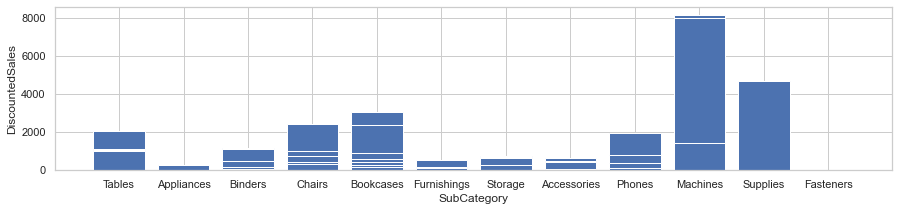

In [115]:
plt.rcParams['figure.figsize']=(15,3)
plt.bar(loss_df['SubCategory'],loss_df['DiscountedSales']);
plt.rcParams.update({'font.size':10});
plt.xlabel('SubCategory');
plt.ylabel('DiscountedSales');

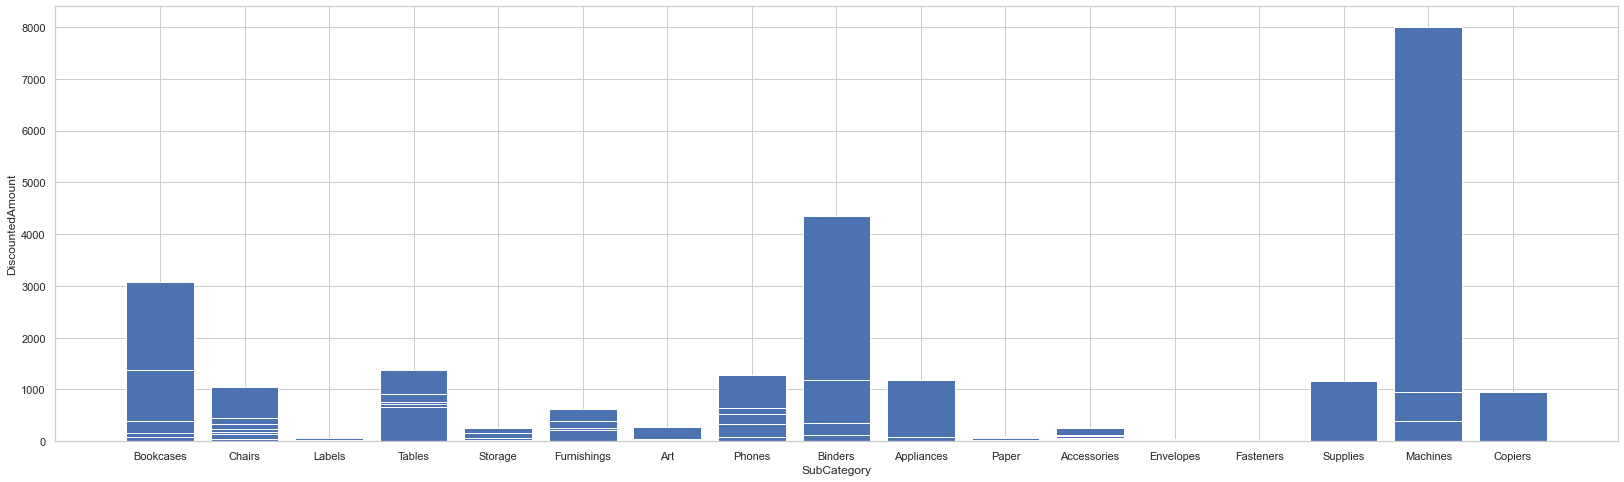

In [116]:
plt.rcParams['figure.figsize']=(28,8)
plt.bar(df['SubCategory'],df['DiscountedAmount']);
plt.rcParams.update({'font.size':14});
plt.xlabel('SubCategory')
plt.ylabel('DiscountedAmount')
plt.show()

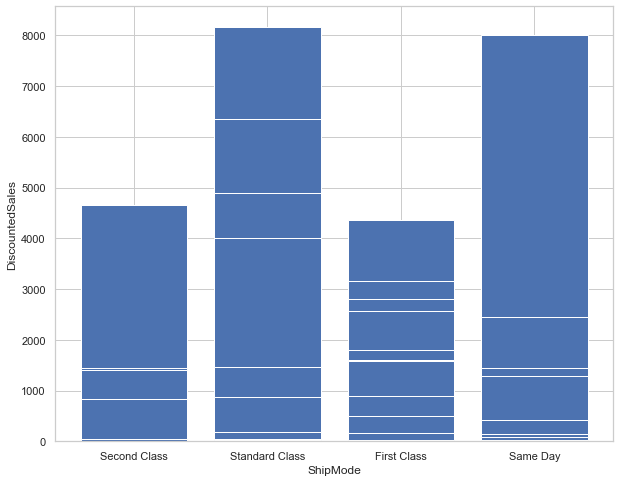

In [117]:
plt.rcParams['figure.figsize']=(10,8)
plt.bar(df['ShipMode'],df['DiscountedSales']);
plt.rcParams.update({'font.size':14});
plt.xlabel('ShipMode');
plt.ylabel('DiscountedSales');

**SALES, PROFIT PROPORTIONS ACROSS VARIOUS FEATURES**

**CUSTOMER REGIONAL ANALYSIS**

In [118]:
region_analysis = pd.DataFrame(df.groupby(['Region'])['Profit'].sum().reset_index())
region_analysis

,Region,Profit
0,Central,4003.9282
1,East,13725.0197
2,South,10181.1107
3,West,21887.4321


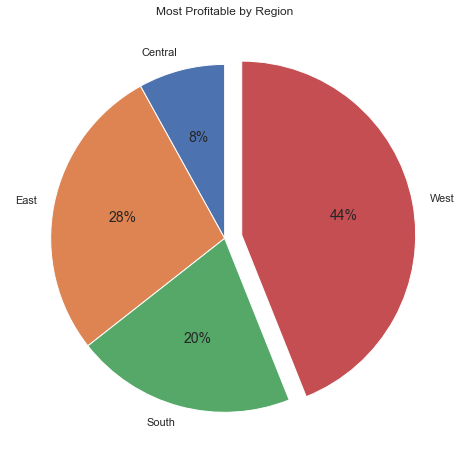

In [119]:
# Plot Pie Chart
plt.pie(region_analysis.Profit, 
        labels = region_analysis.Region, 
        startangle = 90, autopct = "%1.0f%%", 
        explode = [0, 0, 0, 0.1])
plt.title("Most Profitable by Region")
plt.show()

- Analysis of delayed orders and timely order. I set a limit of the delivery days to be 5. Any item delivered later than five 
is considered late/delayed as shown below.

<AxesSubplot:title={'center':'Timely vs Delayed'}>

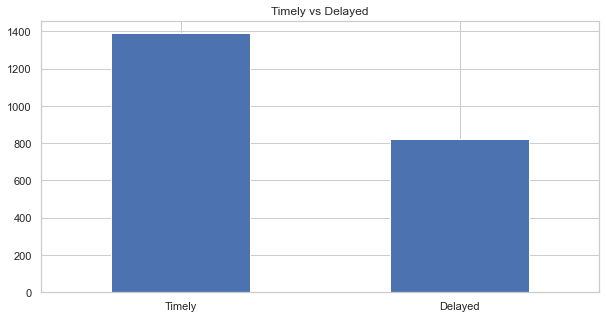

In [120]:
plt.figure(figsize=(10,5))
delayed_count=df['Reliability'].value_counts()
delayed_count.plot(kind = 'bar',title = 'Timely vs Delayed',rot=0)

- Shipping-Mode Wise Distribution

In [121]:
shipping_dist = df.pivot_table(index='ShipMode', 
                                         columns='Reliability', 
                                         values='OriginalSales', 
                                         aggfunc='count', 
                                         margins=True)
shipping_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
shipping_dist['Timely_proportion'] = round((shipping_dist['Timely']/shipping_dist['TotalOrders'])*100,2)
shipping_dist['Delayed_proportion'] = round((shipping_dist['Delayed']/shipping_dist['TotalOrders'])*100,2)
shipping_dist

Reliability,Delayed,Timely,TotalOrders,Timely_proportion,Delayed_proportion
ShipMode,,,,,
First Class,0,395,395,100.00,0.00
Same Day,0,103,103,100.00,0.00
Second Class,101,349,450,77.56,22.44
Standard Class,721,542,1263,42.91,57.09
All,822,1389,2211,62.82,37.18


Orders shipped with the 'first class' and 'Same day' modes did not experience any delay in their delivery. Same can be said for the larger sect of those who ordered using second class. Majority of the delayed orders can be found with customers who shipped using standard class.
I went on to check the region distribution of the delayed and timely delivery to see if the distance also played a role


**REGION-WISE DISTRIBUTION**

In [122]:
region_dist = df.pivot_table(index='Region', 
                               columns='Reliability', 
                               values='OriginalSales', 
                               aggfunc='count', 
                               margins=True)
region_dist.rename({ 'All':'TotalOrders'}, axis=1, inplace=True)
region_dist['Timely_proportion'] = round((region_dist['Timely']/region_dist['TotalOrders'])*100,2)
region_dist['Delayed_proportion'] = round((region_dist['Delayed']/region_dist['TotalOrders'])*100,2)
region_dist

Reliability,Delayed,Timely,TotalOrders,Timely_proportion,Delayed_proportion
Region,,,,,
Central,210,305,515,59.22,40.78
East,217,476,693,68.69,31.31
South,106,208,314,66.24,33.76
West,289,400,689,58.06,41.94
All,822,1389,2211,62.82,37.18


- Maximum percentage of delayed orders has been from the Central Region with the East experiencing the least.

#### RECOMMENDATIONS
- Focus on Technology sub-category and Phones and Chairs as they are highest selling and most profitable. Bundle them with the less profitable products such as Bookcases, Table and Chairs to offset the losses.
- Selling Bookcases and Tables result in huge losses, so Super Store has to consider to bundle them together with High Selling or Profitable sub-category such as Chairs, Copiers, Phones and Office Supplies products.
- For Home Offices customers, these people might be busy with work and less likely to spend time selecting individual products, so create a Home Office package with products used for offices such as table, chairs, phone, copiers, storage, label, fasteners, bookcases.
- For loss-making products like Supplies, Bookcases, Tables, consider to either drop these from the catalogue or change suppliers and bargain for cheaper price.
- Consumer and Corporate Segment make up more than 70% of customerbase. Target them, especially customers from the East and West region in the Top 10 cities with Highest Sales by introducing special promotions and bundles for mass Consumer and Home Offices and send promotional emails or flyers

The main reason which leads to loss is Discount as if some areas lead to loss due to more discounts, and some areas lead to fewer sales due to fewer discounts, hence it needs to be improved.
It is better to give more discounts during festival seasons, additionally, that will result in more sales.
The Home office segment needs better improvement.
Some cities have fewer sales, lack of awareness can be the reason for this, hence advertising in those cities might help in more sales.

#### ADVERTISING STRATEGY FOR GROUPED PRODUCTS

In the event that the company wants to run product package promos, that is, where two or three items can be sold together, we can find the most common items that are usually bought together to inform the company's decsion.

In [123]:
#creating a dataset with order id's having more than one item ordered with same id
common_orderid=df[df['OrderID'].duplicated(keep=False)]

# Because i am about to combine items with the same order id and separate by a comma, i have to remove the comma 
# from the product names in the individual rows
common_orderid['ProductName'] = common_orderid['ProductName'].str.replace(',','')

#Groupting products having the same order id into one row separated by a comma
common_orderid['grouped'] = common_orderid.groupby(['OrderID'])['ProductName'].transform(lambda x : ','.join(x))
common_orderid.head(5)

,OrderID,OrderDate,ShipDate,OrderMonth,OrderYear,DeliveryDays,ShipMode,CustomerID,CustomerName,Segment,City,...,DiscountedSales,Quantity,Discount(%),Profit,OriginalSales,UnitPrice,CostPrice,DiscountedAmount,Profit%,Reliability,grouped
0,CA-2018-152156,2018-11-08,2018-11-11,November,2018,3,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,261.9600,2,0.00,41.9136,261.96,130.98,220.0464,0.0000,19.047619,Timely,"Bush Somerset Collection Bookcase,Hon Deluxe F..."
1,CA-2018-152156,2018-11-08,2018-11-11,November,2018,3,Second Class,CG-12520,Claire Gute,Consumer,Henderson,...,731.9400,3,0.00,219.5820,731.94,243.98,512.3580,0.0000,42.857143,Timely,"Bush Somerset Collection Bookcase,Hon Deluxe F..."
3,US-2017-108966,2017-10-11,2017-10-18,October,2017,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,1741.05,348.21,1340.6085,783.4725,-28.571429,Delayed,"Bretford CR4500 Series Slim Rectangular Table,..."
4,US-2017-108966,2017-10-11,2017-10-18,October,2017,7,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,...,22.3680,2,0.20,2.5164,27.96,13.98,19.8516,5.5920,12.676056,Delayed,"Bretford CR4500 Series Slim Rectangular Table,..."
5,CA-2016-115812,2016-06-09,2016-06-14,June,2016,5,Standard Class,BH-11710,Brosina Hoffman,Consumer,Los Angeles,...,48.8600,7,0.00,14.1694,48.86,6.98,34.6906,0.0000,40.845070,Delayed,Eldon Expressions Wood and Plastic Desk Access...
